In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel(r"//home//karl//Desktop//yearFour_lecMaterials//first_Semester//artificial_Intelligent"
                   r"//06_Python_Object_Class-main//dataset.xlsx")
print(df)



      ID                                         Department       Birth place  \
0      1   Department of Obstetrics and Gynecology, West...           Guizhou   
1      2   Department of Obstetrics and Gynecology, Sout...   Anshun, Guizhou   
2      3                                  Internal Medicine   Anshun, Guizhou   
3      4   Department of Obstetrics and Gynecology, Sout...           Guizhou   
4      5   Department of Obstetrics and Gynecology, West...   Anshun, Guizhou   
..   ...                                                ...               ...   
522  523                              Department of Surgery            Anshun   
523  524                              Department of Surgery            Anshun   
524  525                              Department of Surgery   Anshun, Guizhou   
525  526                               Emergency Department   Anshun, Guizhou   
526  527                              Department of Surgery   Anshun, Guizhou   

                           

In [9]:
# Question 1
df.columns = df.columns.str.strip() 
df.columns = df.columns.str.replace(r'[^\w\s]', '') 
df.replace('', pd.NA, inplace=True)

df['Discharge diagnosis'] = df['Discharge diagnosis'].str.lower()

df['Admission time'] = pd.to_datetime(df['Admission time'], errors='coerce')
df['Discharge time'] = pd.to_datetime(df['Discharge time'], errors='coerce')
print(df)

      ID                                         Department       Birth place  \
0      1   Department of Obstetrics and Gynecology, West...           Guizhou   
1      2   Department of Obstetrics and Gynecology, Sout...   Anshun, Guizhou   
2      3                                  Internal Medicine   Anshun, Guizhou   
3      4   Department of Obstetrics and Gynecology, Sout...           Guizhou   
4      5   Department of Obstetrics and Gynecology, West...   Anshun, Guizhou   
..   ...                                                ...               ...   
522  523                              Department of Surgery            Anshun   
523  524                              Department of Surgery            Anshun   
524  525                              Department of Surgery   Anshun, Guizhou   
525  526                               Emergency Department   Anshun, Guizhou   
526  527                              Department of Surgery   Anshun, Guizhou   

                           

In [13]:
# Question 2
df['Stay Duration'] = df['Discharge time'] - df['Admission time']
average_stay_duration = df['Stay Duration'].mean()

average_medical_expenses = df.groupby('Department')['Medical fees'].mean()

most_common_discharge_diagnosis = df['Discharge diagnosis'].mode()[0]

print("Average stay duration for patients:", average_stay_duration)
print("\nAverage medical expenses by department:")
print(average_medical_expenses)
print("\nMost common discharge diagnosis:", most_common_discharge_diagnosis)


Average stay duration for patients: 13 days 16:45:32.447817836

Average medical expenses by department:
Department
Department of Obstetrics and Gynecology, South Hospital       394.048780
Department of Obstetrics and Gynecology, Western Hospital     345.462687
Department of Surgery                                         533.022727
Emergency Department                                          377.500000
Internal Medicine                                             388.607240
Neck, shoulder, waist and leg pain department                3974.533333
Pediatrics                                                    432.727273
Second Department of Surgery                                  498.566667
Name: Medical fees, dtype: float64

Most common discharge diagnosis:  community acquired pneumonia


In [14]:
#  Question 3
birthplace_summary = df.groupby('Birth place').agg({
    'fees and': 'sum',
    'Medical fees': 'sum'
})

department_summary = df.groupby('Department').agg({
    'Surgery Fees': 'mean',
    'bed fee': 'mean'
})

print("Summarized total 'fees and Outpatient' and 'Medical Expenses' for each 'Place of Birth':")
print(birthplace_summary)
print("\nAverage 'Surgery Expenses' and 'Bed Fees' for each 'Department':")
print(department_summary)

Summarized total 'fees and Outpatient' and 'Medical Expenses' for each 'Place of Birth':
                                                     fees and  Medical fees
Birth place                                                                
 Anshun                                             161610.88       21050.0
 Anshun City                                        173624.64       23019.0
 Anshun City Three Taiwan Grain Bureau                1229.56         457.0
 Anshun Ninggu Shangyuan                              2292.59         351.0
 Anshun, Guizhou                                    915585.73      148506.7
...                                                       ...           ...
 local                                               51402.73       23240.5
 xishuiguan                                           3951.11         553.0
Changchong Village, Caiguan Town                      2726.76         511.0
Wozhi Village, Xinchang Township                      2483.85         410.0

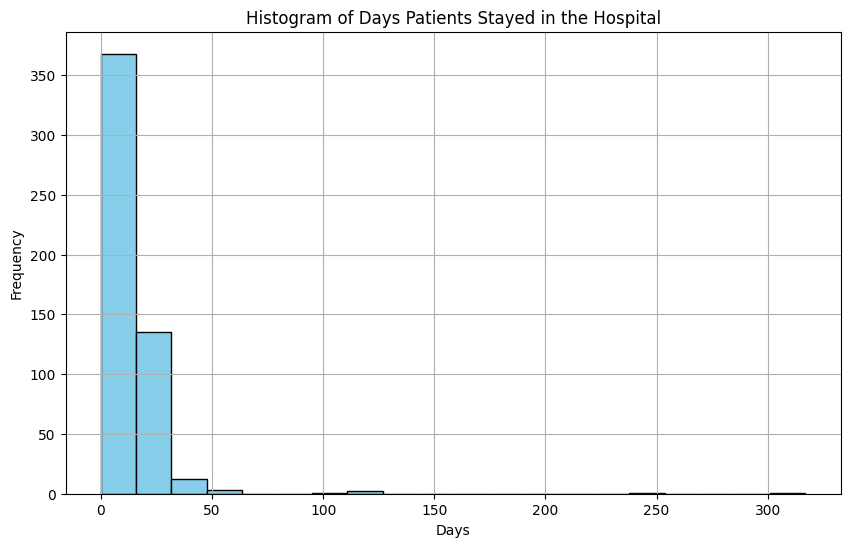

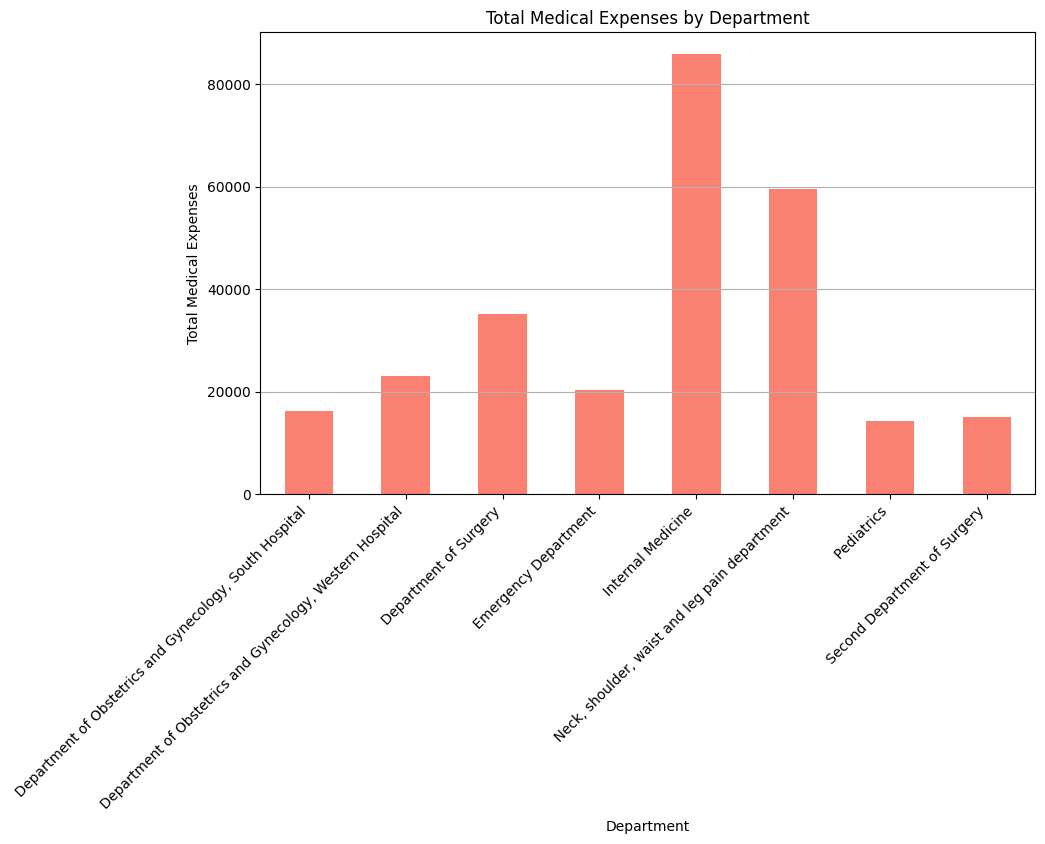

<Figure size 1000x600 with 0 Axes>

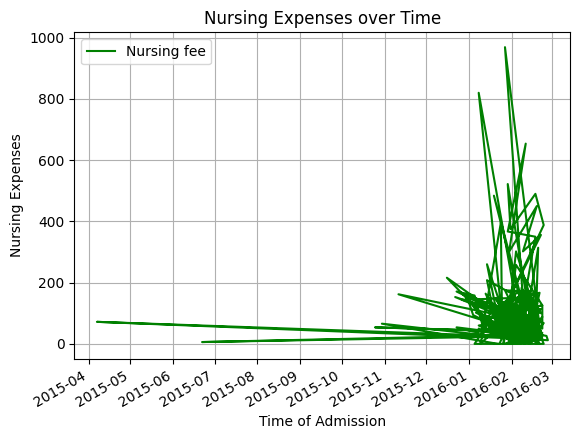

In [19]:
# Question 4
#  Histogram of the 'Days' patients stayed in the hospital
plt.figure(figsize=(10, 6))
plt.hist(df['days'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Days Patients Stayed in the Hospital')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Bar chart showing the total 'Medical Expenses' for each 'Department'
department_expenses = df.groupby('Department')['Medical fees'].sum()
plt.figure(figsize=(10, 6))
bar_plot = department_expenses.plot(kind='bar', color='salmon')
plt.title('Total Medical Expenses by Department')
plt.xlabel('Department')
plt.ylabel('Total Medical Expenses')
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y')

for tick in bar_plot.get_xticklabels():
    tick.set_rotation(45)
    tick.set_ha('right')

plt.show()


# Line plot of 'Nursing Expenses' over time based on the 'Time of Admission'
plt.figure(figsize=(10, 6))
df.plot(x='Admission time', y='Nursing fee', color='green')
plt.title('Nursing Expenses over Time')
plt.xlabel('Time of Admission')
plt.ylabel('Nursing Expenses')
plt.grid(True)
plt.show()


In [7]:
# Question 5
import pandas as pd
# A correlation analysis between 'Medical Expenses' and all other numerical expense-related columns
expense_columns = ['Medical fees', 'fees and', 'lab fees', 'Inspection fees', 'Western medicine fees',
                   'Nursing fee', 'grass fee', 'Anesthesia fee', 'Other fees', 'Surgery Fees', 'bed fee']

correlation = df[expense_columns].corrwith(df['Medical fees'])
print("Correlation between 'Medical Expenses' and other expense-related columns:")
print(correlation)

# A pivot table to analyze the relationship between 'Department', 'Place of Birth', and 'Medical Expenses'
pivot_table = pd.pivot_table(df, values='Medical fees', index='Department', columns='Birth place', aggfunc='mean')
print("\nPivot table showing the relationship between 'Department', 'Place of Birth', and 'Medical Expenses':")
print(pivot_table)

Correlation between 'Medical Expenses' and other expense-related columns:
Medical fees             1.0
fees and                 1.0
lab fees                 1.0
Inspection fees          1.0
Western medicine fees    1.0
Nursing fee              1.0
grass fee                1.0
Anesthesia fee           1.0
Other fees               1.0
Surgery Fees             1.0
bed fee                  1.0
dtype: float64

Pivot table showing the relationship between 'Department', 'Place of Birth', and 'Medical Expenses':
Birth place   City   Town
Department               
A            200.0    NaN
B              NaN  300.0
